In [2]:
# imports
# standard imports
import numpy as np
import pandas as pd
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [6]:
# looks like every row is a date
# treat it like a datetime index
df['Date'] = pd.to_datetime(df.Date)

In [7]:
df = df.set_index('Date')

In [9]:
df['Month'] = df.index.month_name()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          365 non-null    object 
 1   Temperature  365 non-null    float64
 2   Rainfall     365 non-null    float64
 3   Flyers       365 non-null    int64  
 4   Price        365 non-null    float64
 5   Sales        365 non-null    int64  
 6   Month        365 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 22.8+ KB


In [11]:
# initialize two empty lists,
# add numerical ones to the num_cols,
# toss anything else to cat_cols
num_cols, cat_cols = [], []
for col in df.columns:
    if np.issubdtype(df[col], np.number):
        num_cols.append(col)
    else:
        cat_cols.append(col)

In [12]:
cat_cols

['Day', 'Month']

In [13]:
num_cols

['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

In [14]:
df.Month.dtype == 'O'

True

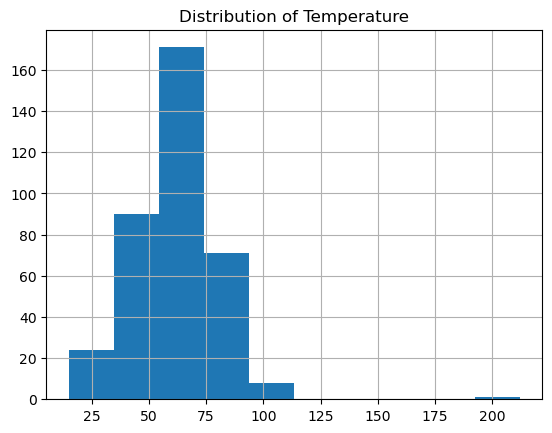

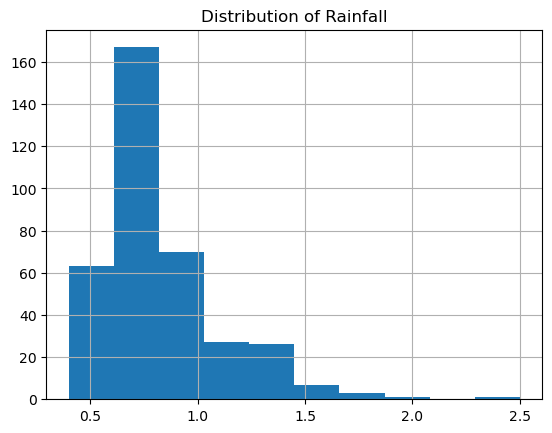

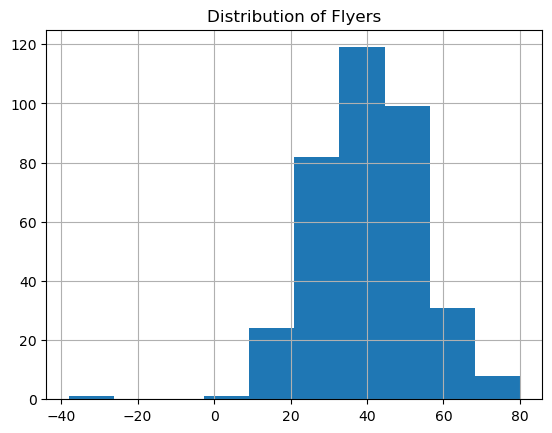

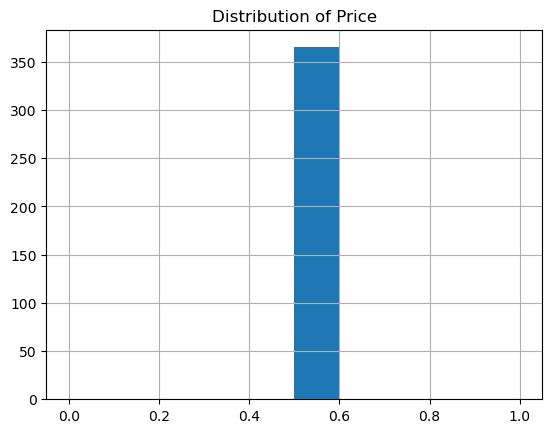

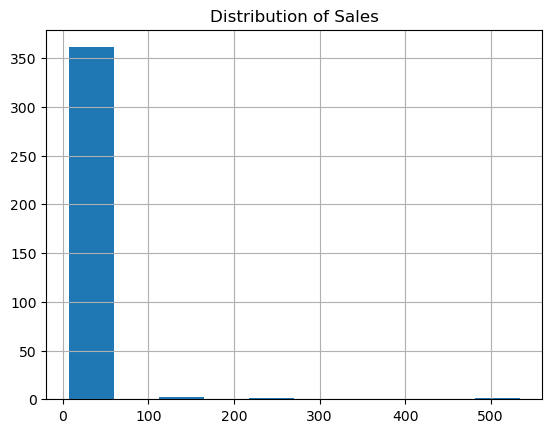

In [15]:
# initial visual
# histogram of numeric info
for col in num_cols:
    df[col].hist()
    plt.title(f'Distribution of {col}')
    plt.show()

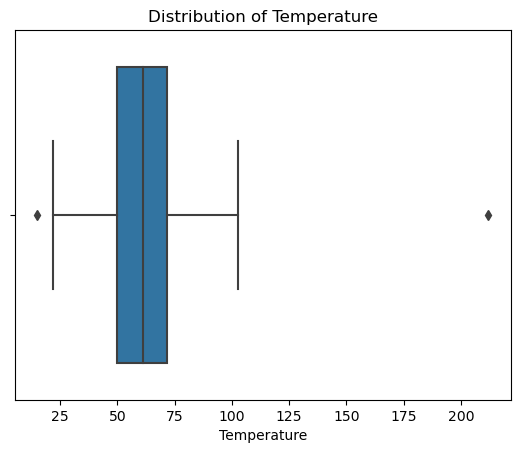

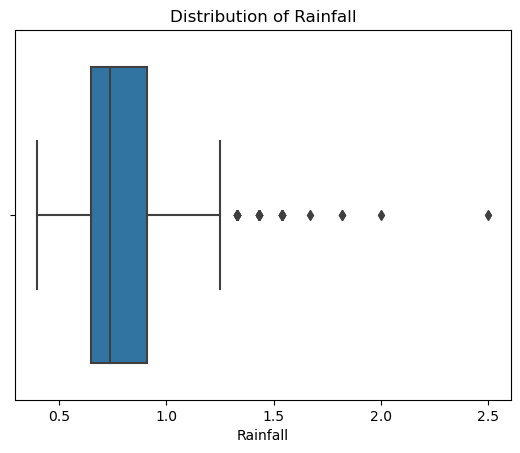

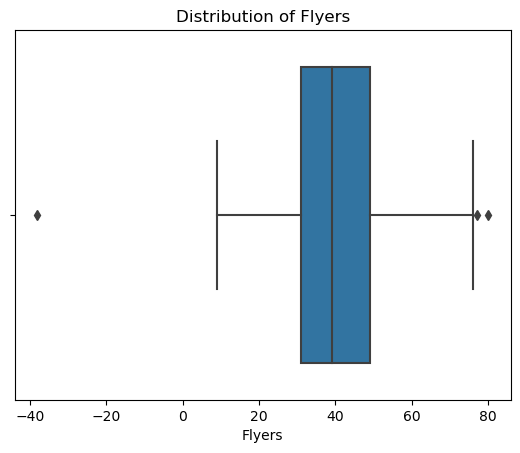

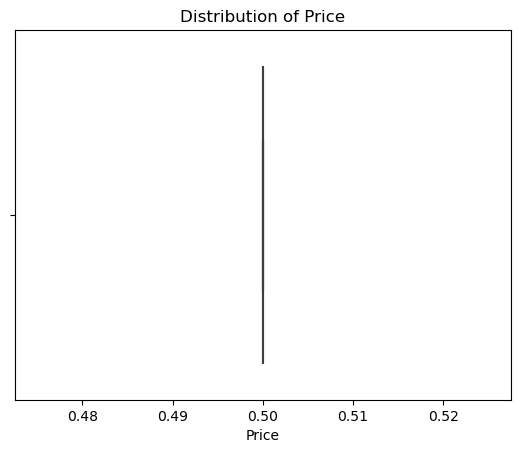

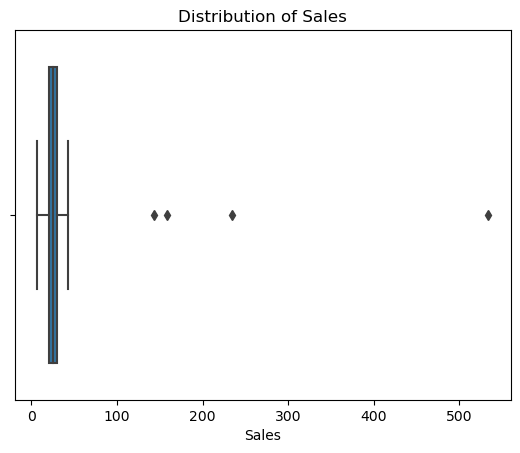

In [16]:
for col in num_cols:
    sns.boxplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

Take aways

- one day with extreme temps
- one day with negative flyers
- heavy rainfall days?
- extremely high sale days

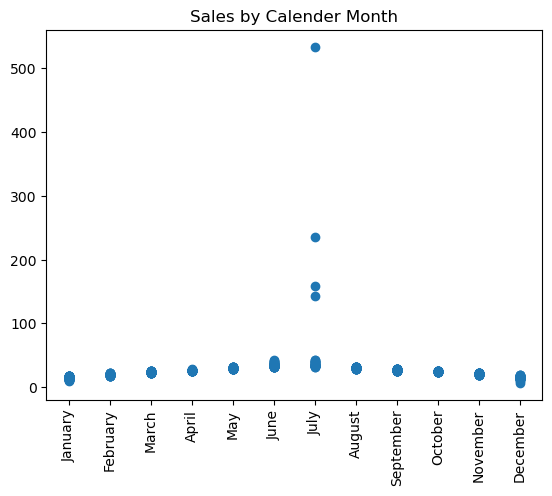

In [17]:
# sales based on day/month
plt.scatter(df.Month, df.Sales)
plt.title('Sales by Calender Month')
plt.xticks(rotation=90)
plt.show()

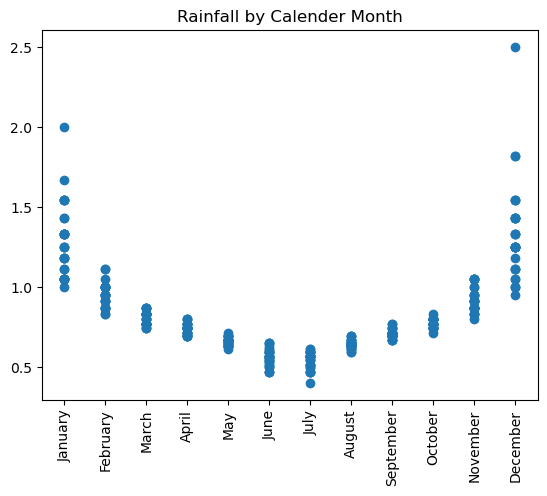

In [18]:
# rainfall
plt.scatter(df.Month, df.Rainfall)
plt.title('Rainfall by Calender Month')
plt.xticks(rotation=90)
plt.show()

In [19]:
def get_lower_and_upper_bounds(col, k=1.5):
    '''This function will take in two arguments:
    col, positional, a pandas series,
    k, kwarg, the multiplier for the fence multiplied by the IQR
    
    returns: lower_fence, upper_fence. values representing
    the respective lower and upper fence based on the Turkey method
    as per the k multiplier specified'''
    
    q1, q3 = col.quantile(0.25), col.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - iqr*k
    upper_fence = q3 + iqr*k
    return lower_fence, upper_fence

In [20]:
get_lower_and_upper_bounds(df['Rainfall'])

(0.26, 1.3)

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [21]:
# empty dictionary to hold outliers
outliers = {}
# for every column (string literal) in my num cols:
for col in num_cols:
    #define a new place for my outlier fences to sit,
    #based on the column name
    # such as outliers['Rainfall'] = {}
    outliers[col] = {}
    #define my k
    k = 1.5
    # call my custom fence function, which returns two values
    # put it in my dictionary under the column name, but also
    # under the specific fence value
    # outliers['Rainfall'][1.5] = (lower_val, upper_val)
    outliers[col][k] = get_lower_and_upper_bounds(df[col], k=k)
    print(f' For column {col}')
    # print my dataframe, but only the rows that are below that 
    # lower fence, or above my upper fence
    # take that set of rows, transpose them
    # put it in markdown table format
    # and print it
    print(df[(df[col] < outliers[col][k][0]) | (df[col] > outliers[col][k][1])].to_markdown())
    print('===============')

 For column Temperature
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | Month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |         212   |       0.91 |       35 |     0.5 |      21 | February |
| 2017-12-31 00:00:00 | Sunday   |          15.1 |       2.5  |        9 |     0.5 |       7 | December |
 For column Rainfall
| Date                | Day       |   Temperature |   Rainfall |   Flyers |   Price |   Sales | Month    |
|:--------------------|:----------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday    |          27   |       2    |       15 |     0.5 |      10 | January  |
| 2017-01-02 00:00:00 | Monday    |          28.9 |       1.33 |       15 |     0.5 |      13 | January  |
| 2017-01-03 00:00:00 | Tuesday   |          34.5 |       1.33 |       27 |     0.5 |      15 | January

In [22]:
outliers

{'Temperature': {1.5: (16.700000000000003, 104.7)},
 'Rainfall': {1.5: (0.26, 1.3)},
 'Flyers': {1.5: (4.0, 76.0)},
 'Price': {1.5: (0.5, 0.5)},
 'Sales': {1.5: (5.0, 45.0)}}

In [24]:
# empty dictionary for outliers
for col in num_cols:
    #define a new place for my outlier fences to sit,
    #based on the column name
    #define my k
    k=3
    # call my custom fence function, which returns two values
    # put it in my dictionary under the column name, but also
    # under the specific fence value
    # outliers['Rainfall'][1.5] = (lower_val, upper_val)
    outliers[col][k] = get_lower_and_upper_bounds(df[col], k=k)
    print(f' For column {col}')
    # print my dataframe, but only the rows that are below that 
    # lower fence, or above my upper fence
    # take that set of rows, transpose them
    # put it in markdown table format
    # and print it
    print(df[(df[col] < outliers[col][k][0]) | (df[col] > outliers[col][k][1])].to_markdown())
    print('===============')

 For column Temperature
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | Month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 | February |
 For column Rainfall
| Date                | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales | Month    |
|:--------------------|:--------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday  |          27   |       2    |       15 |     0.5 |      10 | January  |
| 2017-12-05 00:00:00 | Tuesday |          22   |       1.82 |       11 |     0.5 |      10 | December |
| 2017-12-10 00:00:00 | Sunday  |          31.3 |       1.82 |       15 |     0.5 |      11 | December |
| 2017-12-31 00:00:00 | Sunday  |          15.1 |       2.5  |        9 |     0.5 |       7 | December |
 For co

In [25]:
outliers['Temperature'][3]

(-16.299999999999997, 137.7)

In [26]:
col

'Sales'

In [27]:
df[((df['Flyers'] - df['Flyers'].mean()) / df['Flyers'].std()).abs() > 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November


In [28]:
for col in num_cols:
    print(f' For Column {col}')
    print(df[((df[col] - df[col].mean()) / df[col].std()).abs() > 2].to_markdown())

 For Column Temperature
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | Month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |         212   |       0.91 |       35 |     0.5 |      21 | February |
| 2017-06-16 00:00:00 | Friday   |          99.3 |       0.47 |       77 |     0.5 |      41 | June     |
| 2017-06-26 00:00:00 | Monday   |         102.6 |       0.47 |       60 |     0.5 |      42 | June     |
| 2017-07-01 00:00:00 | Saturday |         102.9 |       0.47 |       59 |     0.5 |     143 | July     |
| 2017-07-10 00:00:00 | Monday   |          98   |       0.49 |       66 |     0.5 |      40 | July     |
| 2017-07-18 00:00:00 | Tuesday  |          99.3 |       0.47 |       76 |     0.5 |      41 | July     |
| 2017-07-22 00:00:00 | Saturday |          99.6 |       0.47 |       49 |     0.5 |      42 | July     |
| 2017-07-27 00:00:00 

In [29]:
# sales check
df.loc['2017-06-30': '2017-07-05']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-06-30,Friday,89.4,0.53,47,0.5,38,June
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July
2017-07-05,Wednesday,93.0,0.40,55,0.5,40,July


In [30]:
# rainfall check
df.loc['2017-12']['Rainfall']
df.loc['2017-01']['Rainfall']

Date
2017-01-01    2.00
2017-01-02    1.33
2017-01-03    1.33
2017-01-04    1.05
2017-01-05    1.00
2017-01-06    1.54
2017-01-07    1.54
2017-01-08    1.18
2017-01-09    1.18
2017-01-10    1.05
2017-01-11    1.54
2017-01-12    1.33
2017-01-13    1.33
2017-01-14    1.05
2017-01-15    1.11
2017-01-16    1.67
2017-01-17    1.43
2017-01-18    1.18
2017-01-19    1.18
2017-01-20    1.43
2017-01-21    1.25
2017-01-22    1.11
2017-01-23    1.05
2017-01-24    1.54
2017-01-25    1.25
2017-01-26    1.25
2017-01-27    1.05
2017-01-28    1.33
2017-01-29    1.33
2017-01-30    1.05
2017-01-31    1.05
Name: Rainfall, dtype: float64

In [43]:
# seems like a lot of lemonade sold aroud July 4th,
# lots of rain in the winter
# will call these results valid and consider them in
# further analysis

In [ ]:
# temp and flyers
# weird temp day: 2017-02-11
# weird flyer day: 2017-11-21

In [31]:
# temp around 2-11:
df.loc['2017-02-08':'2017-02-13']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-02-08,Wednesday,52.6,0.87,31,0.5,22,February
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February
2017-02-10,Friday,50.0,0.91,40,0.5,20,February
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-02-12,Sunday,55.6,0.83,41,0.5,22,February
2017-02-13,Monday,46.4,1.11,34,0.5,18,February


In [32]:
df.Temperature.mean()

61.22465753424662

In [34]:
df.groupby("Month").Temperature.mean()['February']

53.67142857142857

In [37]:

(df.loc['2017-02-10','Temperature'] + df.loc['2017-02-12','Temperature']) / 2


52.8

In [38]:
df.loc['2017-02-11', 'Temperature'] = df.groupby('Month').Temperature.mean()['February']

In [39]:
df.loc['2017-02-08':'2017-02-13']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-02-08,Wednesday,52.600000,0.87,31,0.5,22,February
2017-02-09,Thursday,42.700000,1.00,39,0.5,19,February
2017-02-10,Friday,50.000000,0.91,40,0.5,20,February
2017-02-11,Saturday,53.671429,0.91,35,0.5,21,February
2017-02-12,Sunday,55.600000,0.83,41,0.5,22,February
2017-02-13,Monday,46.400000,1.11,34,0.5,18,February


In [40]:
df.loc['2017-11-19':'2017-11-22']['Flyers']

Date
2017-11-19    34
2017-11-20    41
2017-11-21   -38
2017-11-22    40
Name: Flyers, dtype: int64

In [41]:
df.loc['2017-11-21','Flyers'] = -1 * df.loc['2017-11-21','Flyers']

In [42]:
df.loc['2017-11-19':'2017-11-22']['Flyers']

Date
2017-11-19    34
2017-11-20    41
2017-11-21    38
2017-11-22    40
Name: Flyers, dtype: int64

Notes:
- we examined a few weird values and took the procedural steps of visualization, IQR methodology, and z score, then scrutinized these data points by analysis of context based on the time/day/rows around them

- Concluded, based on the level of info we have, rainfall and sales anomalies are likely valid

- Concluded an erroneous flyer value was input negative and fixed it

- Concluded and erroneous temp value was just wrong so we guessed it based on aggregate imputation